In [8]:
# imported the required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups
from keras.layers import Embedding, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

In [9]:
# fetched the data 
newsgroups_train = fetch_20newsgroups(subset='train', shuffle=True)
# below we have extracted the features
sentences = newsgroups_train.data
# extracted the target data
y = newsgroups_train.target

In [10]:
# calculated the uniquie words in the data
max_review_len= max([len(s.split()) for s in sentences])
print(max_review_len)
tokenizer = Tokenizer(num_words=2000)
vocab_size= len(tokenizer.word_index)+1
print(vocab_size)
# converts text data to a sequence of integers.
sentences = tokenizer.texts_to_sequences(sentences)
#Pads sequences to equal length.
padded_docs= pad_sequences(sentences,maxlen=max_review_len)
#Encoded the target data
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.3, random_state=1100)

11821
1
11821
1


In [11]:
# created the sequential model
model2 = Sequential()
#vocab size is the input dimension
model2.add(Embedding(vocab_size, 55, input_length=max_review_len))
#flattens the input for next layer
model2.add(Flatten())
#used relu Activation function.
model2.add(layers.Dense(350, activation='relu',input_dim=max_review_len))
model2.add(layers.Dense(25, activation='softmax'))
#compiled the model.
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#trained the model using train data and tested the model with test data.
history2=model2.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/5
Epoch 1/5
31/31 [==============================] - 89s 3s/step - loss: 8.8171 - accuracy: 0.0471 - val_loss: 3.1356 - val_accuracy: 0.0524
Epoch 2/5
Epoch 2/5
31/31 [==============================] - 79s 3s/step - loss: 3.0672 - accuracy: 0.0528 - val_loss: 3.0214 - val_accuracy: 0.0507
Epoch 3/5
Epoch 3/5
31/31 [==============================] - 85s 3s/step - loss: 3.0180 - accuracy: 0.0518 - val_loss: 3.0133 - val_accuracy: 0.0542
Epoch 4/5
Epoch 4/5
31/31 [==============================] - 82s 3s/step - loss: 3.0054 - accuracy: 0.0484 - val_loss: 3.0081 - val_accuracy: 0.0471
Epoch 5/5
Epoch 5/5
31/31 [==============================] - 80s 3s/step - loss: 3.0005 - accuracy: 0.0482 - val_loss: 3.0227 - val_accuracy: 0.0489


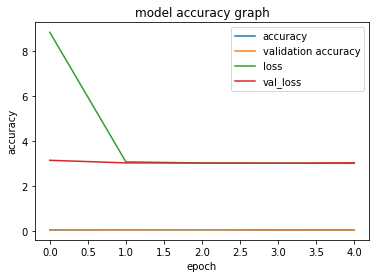

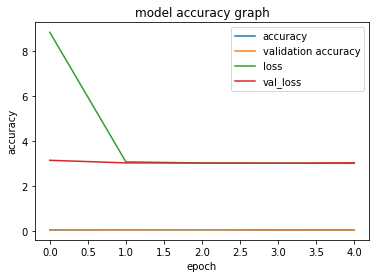

In [12]:
# plotted the accuracy of validation and training data
# plotted the loss of validation and training data
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model accuracy graph')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy','loss','val_loss'], loc='upper right')
plt.show()

In [13]:
#predicting the output for the input data.
X=model2.predict(X_test)
print(X)
print(y_test)
print("Actual Value:",y_test[1])
print("Predicted Value",np.argmax(X[1]))

[[4.4946797e-02 6.2269732e-02 7.8315452e-02 ... 1.6112223e-04
  3.3084987e-05 7.6672695e-05]
 [4.4946797e-02 6.2269732e-02 7.8315452e-02 ... 1.6112223e-04
  3.3084987e-05 7.6672695e-05]
 [4.4946797e-02 6.2269732e-02 7.8315452e-02 ... 1.6112223e-04
  3.3084987e-05 7.6672695e-05]
 ...
 [4.4946827e-02 6.2269662e-02 7.8315400e-02 ... 1.6112196e-04
  3.3084914e-05 7.6672535e-05]
 [4.4946827e-02 6.2269662e-02 7.8315400e-02 ... 1.6112196e-04
  3.3084914e-05 7.6672535e-05]
 [4.4946827e-02 6.2269662e-02 7.8315400e-02 ... 1.6112195e-04
  3.3084914e-05 7.6672528e-05]]
[ 1 12  2 ...  7  0 11]
Actual Value: 12
Predicted Value 2
[[4.4946797e-02 6.2269732e-02 7.8315452e-02 ... 1.6112223e-04
  3.3084987e-05 7.6672695e-05]
 [4.4946797e-02 6.2269732e-02 7.8315452e-02 ... 1.6112223e-04
  3.3084987e-05 7.6672695e-05]
 [4.4946797e-02 6.2269732e-02 7.8315452e-02 ... 1.6112223e-04
  3.3084987e-05 7.6672695e-05]
 ...
 [4.4946827e-02 6.2269662e-02 7.8315400e-02 ... 1.6112196e-04
  3.3084914e-05 7.6672535e-05]
